<a href="https://colab.research.google.com/github/DeisyData/Curso-Inteligencia-Artificial/blob/main/Clase_1_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalando librerias

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=00091f820af869081e60cdcff700cce341c543e2ca1b55e52f6e685c241a9b80
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


# 2. Importar librerias

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Control Proporcional - Sistema SISO
Implementar la logica de control proporcional en logica difusa

*   INPUT: error
*   SALIDA : acción de control  
*   U : [-100,100]

### **PASO 1. Variable de entrada**

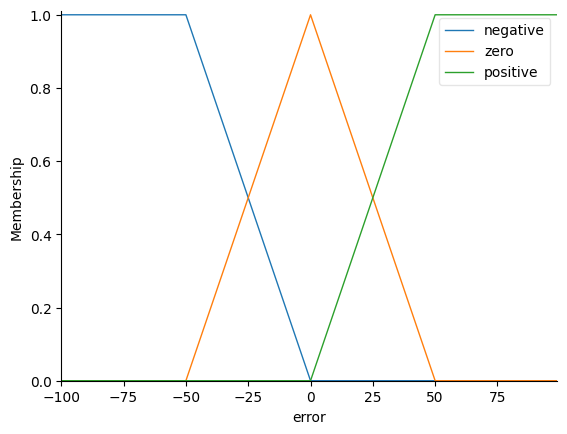

In [ ]:
error = ctrl.Antecedent(np.arange(-100,100,1),'error')
error['negative'] = fuzz.trapmf(error.universe,[-100,-100,-50,0])
error['zero'] = fuzz.trimf(error.universe,[-50,0,50])
error['positive'] = fuzz.trapmf(error.universe,[0,50,100,100])
error.view()

### **PASO 2. Variable de salida**

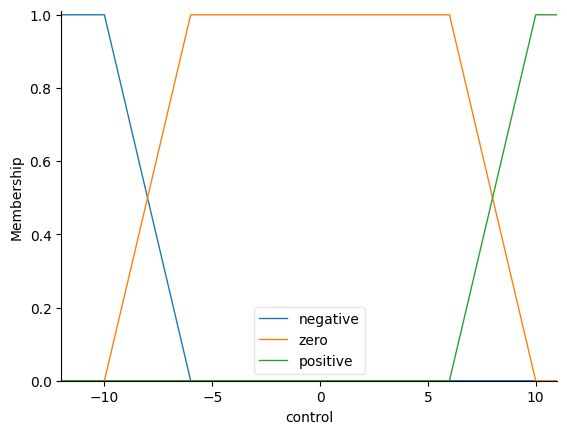

In [ ]:
control = ctrl.Consequent(np.arange(-12,12,1), 'control')
control['negative'] = fuzz.trapmf(control.universe,[-12,-12,-10,-6])
control['zero'] = fuzz.trapmf(control.universe,[-10,-6,6,10])
control['positive'] = fuzz.trapmf(control.universe,[6,10,12,12])
control.view()

### **PASO 3. Inferencia**

In [ ]:
rule1 = ctrl.Rule(error['negative'],control['negative'])
rule2 = ctrl.Rule(error['zero'],control['zero'])
rule3 = ctrl.Rule(error['positive'],control['positive'])

In [ ]:
control_sys = ctrl.ControlSystem([rule1,rule2,rule3])
control_sim = ctrl.ControlSystemSimulation(control_sys)

### **PASO 4. Evaluar/SImular en un punto**

Salida defuzzificada = 1.5097588978185987
Salida defuzzificada  redodenada= 1.51


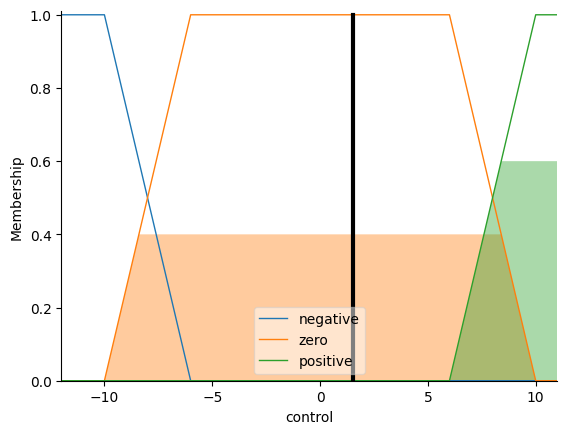

In [ ]:
control_sim.input['error'] = 30
control_sim.compute()
control.view(sim=control_sim)
print("Salida defuzzificada =", control_sim.output['control'])
print("Salida defuzzificada  redodenada=", round(control_sim.output['control'],2))